<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/master/XGBoost_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XGBoost**

In [1]:
# importo las librerias
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# cargo el set de datos de pruebas "Boston"
from sklearn.datasets import load_boston
boston = load_boston()
print( "Type of boston dataset:", type(boston))
print(boston)

Type of boston dataset: <class 'sklearn.utils.Bunch'>
{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25

## convertimos el set de datos en un dataframe

In [3]:
import pandas as pd

data = pd.DataFrame(boston.data)
#convierto las columnas en lo features
data.columns=boston.feature_names

## agregamos el target al dataframe

In [4]:
data['PRICE']=boston.target

## separamos la variable a *predecir*

In [5]:
# separamos las variables, dejamos en X los atributos y en y la variable a predecir (price)
X,y=data.iloc[:,:-1],data.iloc[:,-1]

## creamos el set de entrenamiento y de test

In [6]:
# importamos la funcion train_test_split que permite separar un set que tengamos (en este caso en X donde tenemos los datos)
# separamos X en X_train y en X_test; mientras que a y lo separamos en y_train e y_test
from sklearn.model_selection import train_test_split

In [7]:
# en y_train e y_test van a estar los valores de TARGET para predecir
X_train, X_test, y_train, y_test =\
  train_test_split(X,y,test_size=0.2, random_state=123)
# seteamos random_state para que cada vez que lo corramos tengamos la misma division (?)

## splicamos **XGBoost**

## Hiper-parámetros


*   **learning_rate**: tasa de aprendizaje (valores chicos, porque valores a 1 nos pueden generar overfitting)
*   **max_depth**: maxima profundidad de cada arbol (manejamos la maxima posibilidad de cada arbol al igual que RandomForest), aunque va a ser mas acotado en XGBoost
*   **subsample**: % de muestras usadas para cada arbole (valor muy bajo, posible underfitting). Si tenemos un valor muy bajo podemos tener posbilidad de underfitting. Si usamos pocos ejemplos para cada arbol no va a poder entrenarse correctamente)
*   **colsample_bytree**: % de features usadas para cada arbol (valores muy altos, posible overfitting). Vamos a determinar que % de features totales va a utilizarse para construir cada unos de los arboles. Un valor muy alto puede arrojar un  error de overfitting. Tratar de evitar que cada arbol no vea todos los features
*   **n_estimators**: cant de arboles a construir
*   **objective**: funcion de error a utilizar (algunas: reg:squarederror para regresion, reg:logistic o binary:logistic para clasificacion). Para el proceso de aprendizaje.

###Parametros de regularizacion:

*   **gamma**: umbral para hacer split basado en la reduccion de error de hacer el nuevo split. 
*   **alpha**: regularizacion para los pesos de las hojas. Un valor mas alto genera una mayor regularizacion.
*   **lambda**: similar alpha pero para la sintonia fina.






## instanciamos el regresor de XGBoost

In [8]:
xg_reg=xgb.XGBRegressor(objective='reg:squarederror',
                        colsample_bytree=0.3, learning_rate=0.1,
                        max_depth=5, alpha=10, n_estimators =10
                        )

## entrenamos

In [9]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

## predecimos

In [10]:
preds=xg_reg.predict(X_test)

## calculamos el error en la predicciones

In [11]:
rmse= np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.449300


## entrenando y prediciendo con 100 arboles

In [12]:
xg_reg=xgb.XGBRegressor(objective='reg:squarederror',
                        colsample_bytree=0.3, learning_rate=0.1,
                        max_depth=5, alpha=10, n_estimators=100)

xg_reg.fit(X_train,y_train)

preds= xg_reg.predict(X_test)

rmse= np.sqrt(mean_squared_error(y_test,preds))

print('RMSE: %f' % (rmse))

RMSE: 3.851546


In [ ]:
# con solo 10 arboels no nos alcanzaba calcular el precio de una forma eficiente y por eso necesitabamos mas arboles, por eso 100

## entrenando y prediciendo con 100 arboles y mazima profundidad de 4

In [16]:
# modificamos el max_depth a 100 y la profundidad maxima de 4 (arboels mas simples con un nivel menos)

xg_reg=xgb.XGBRegressor(objective='reg:squarederror',
                        colsample_bytree=0.3, learning_rate=0.1,
                        max_depth=4, alpha=10, n_estimators=100)

xg_reg.fit(X_train,y_train)

preds= xg_reg.predict(X_test)

rmse= np.sqrt(mean_squared_error(y_test,preds))

print('RMSE: %f' % (rmse))

RMSE: 3.702329


## **Observación**
#### Se modifica un poco el resultado "toqueteando" los hiperparametros que mejor se adapten o mejor funcionenen con nuestro set de datos y elegir, transformar los features durante el seteo de los hiperparametros.

## **K-fold cross validation** para evitar el overfitting (haciendo un k-fold de los datos)

### se usa el metodo **cv**

## Hiperparametros:

*   **nfolds**: K del k-fold (la cantidad de particiones que hacemos)
*   **num_boost_round**: cantidad de arboles a construir (n_estimators)
*   **metrics**: la metrica de evaluacion a utilizar
*   **as_pandas**: si los resultados lo devuelve en un DataFrame de pandas
*   **early_stopping_rounds**: terminar antes si la metrica no mejora luego de una cantidad de pasadas (para evitar seguir procesando ya que con otras itraciones no logramos mejoras, conviene contar el procesamiento)
*   **seed**: semilla para poder reproducir los resultados.





## convertimos los datos a DMatrix

In [17]:
# esta estructura es para tener los datos de entrenamiento que es bastante eficiente con XGBoost
data_dmatrix=xgb.DMatrix(data=X, label=y)
# le estamos pasando con argumento todo el conjunto completo del set de datos (y no la parte separada de train y test), y le pasamos todos los 
# label que teniamos en la variable y 

## entrenamos

In [22]:
# tenemos el xgboost en cv
params ={'objective':'reg:squarederror','colsample_bytree':0.3,
         'learning_rate':0.1,'max_depth':5,'alpha':10}

# le pasamos en dtrain el data de matrix (que es donde tenemos los datos y el target),
# luego le pasamos los hiperprametros de xgboos (params), despues el numero de particiones del cross validation que es = 3,
# vamos a utilizar un num_boost_round de 50 arboles, y le vamos a indicar que early_stopping_round sea de 10 o sea que despues de 10 iteraciones 
# sino tenemos mejoras que corte.
# La metrica va a ser el error cuadratico medio (rmse), vamos a indicar que devuelva los resultados como un dataframe de panda y para poder reproducir 
# los resultados indicamos una semilla = 123

cv_results=xgb.cv(dtrain=data_dmatrix,params=params, nfold=3,
                  num_boost_round=50, early_stopping_rounds=10,metrics='rmse', as_pandas=True, seed=123)

## informacion de los resultados

In [20]:
cv_results.head()
# vamos a ver cada una de las 5 iteraciones y podemos ir viendo como va reduciendo el error
# el error de entrenamiento es constante

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.679234,0.025626,21.677613,0.050617
1,19.772293,0.016054,19.773320,0.020571
2,18.049563,0.058904,18.065856,0.082746
3,16.430113,0.013615,16.492199,0.020919
4,15.025977,0.062132,15.132644,0.073104


## error final

In [23]:
print((cv_results["test-rmse-mean"]).tail(1))
# en la ultima iteracion (realizo 49 iteraciones) y muestra el error final del cross validation

49    3.975679
Name: test-rmse-mean, dtype: float64


In [24]:
# el erro comparado sin el cross validation es un poco mas grande - hay que revisar los hiperparametros
# RMSE: 3.851546 vs 3.975679

## visualizando los arboles

In [27]:
# visualizamos
xg_reg=xgb.train(params=params, dtrain=data_dmatrix,num_boost_round=10)

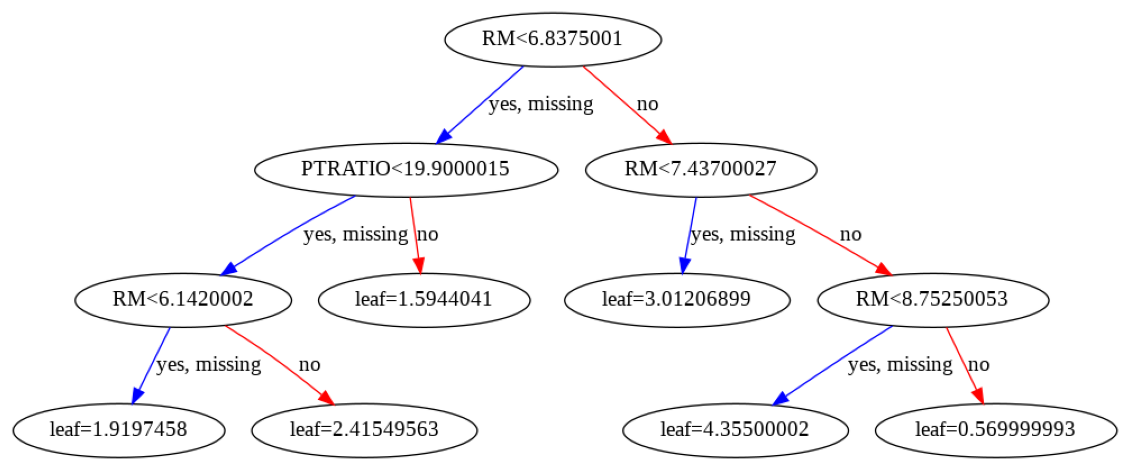

In [29]:
plt.rcParams['figure.figsize']=[20,20]

# metodo plot_tree que le pasamos el modelo entrenado y cual es el arbol que queremos ver ( en este caso queremos ver el arbol 0)
xgb.plot_tree(xg_reg,num_trees=0)

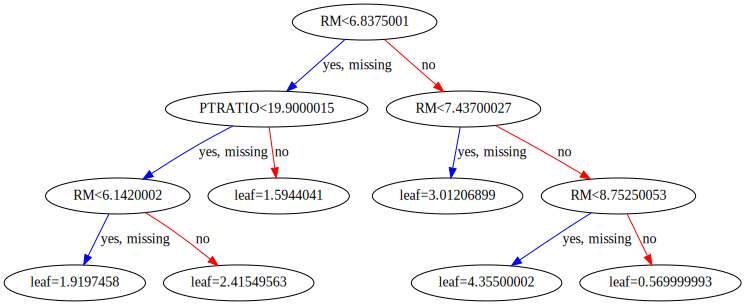

In [31]:
# tambien podemos utilizar to_graphviz para generar el arbol
xgb.to_graphviz(xg_reg,num_trees=0)

## importancia de los features (cuantas veces aparecen los arboles)

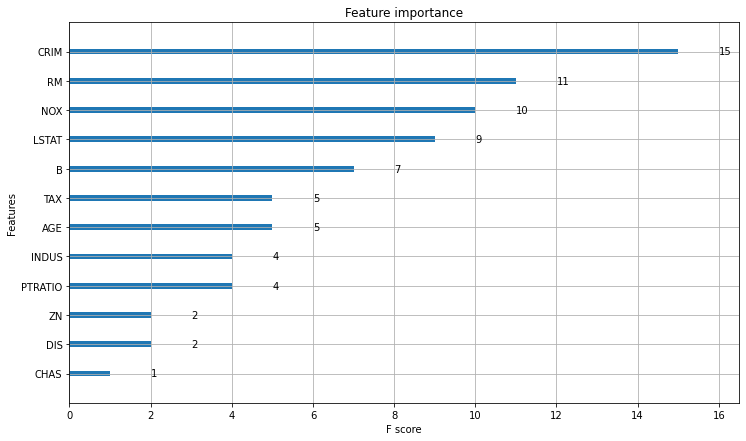

In [32]:
# tenemos el metodo plot_importance, que tambien le pasamos el modelo entrenado
plt.rcParams['figure.figsize']=[12,7]

# vemos cuantas veces aparece un atributo el atributo en los arboles. En gral es mejor la importancia que tenemos en el random forest
# pero es bueno verlo en xgboost para analizar los features. 
# Pero en gral es mas util la importancia de random forest que el de xgboost
xgb.plot_importance(xg_reg)

# en el grafico podemos ver que CRIM es el atributo mas importante